In [69]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

In [13]:
transform = transforms.Compose([transforms.ToTensor()])

data_train = datasets.MNIST(root = "./data/",
                            transform=transform,
                            train = True,
                            download = True)

data_test = datasets.MNIST(root="./data/",
                           transform = transform,
                           train = False)

x_train = data_train.data/255.0

y_train = torch.zeros(len(data_train), 10)
for i in range(len(y_train)):
    for j in range(10):
        if j == data_train.targets[i]:
            y_train[i][j] = 1

x_test = data_test.data/255.0

y_test = torch.zeros(len(data_test), 10)
for i in range(len(y_test)):
    for j in range(10):
        if j == data_test.targets[i]:
            y_test[i][j] = 1

x_train = torch.reshape(x_train, (len(x_train), 28*28))
x_test = torch.reshape(x_test, (len(x_test), 28*28))

In [67]:
class SoftmaxNN(nn.Module):
    def __init__(self, input_dim, num_hidden1, num_hidden2, output_dim):
        super().__init__()
        self.layer1 = nn.Linear(input_dim, num_hidden1)
        self.layer2 = nn.Linear(num_hidden1, num_hidden2)
        self.layer3 = nn.Linear(num_hidden2, output_dim)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = nn.Softmax()(x)
        return x

class SigmoidNN(nn.Module):
    def __init__(self, input_dim, num_hidden1, num_hidden2, output_dim):
        super().__init__()
        self.layer1 = nn.Linear(input_dim, num_hidden1)
        self.layer2 = nn.Linear(num_hidden1, num_hidden2)
        self.layer3 = nn.Linear(num_hidden2, output_dim)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = nn.Sigmoid()(x)
        return x

In [62]:
def model_train( ):
   loss = []
   testing_loss = []
   optimizer = optim.Adam(model.parameters(), lr=0.01)


In [54]:
def Plot(Epochs, Loss, LossTest, act_fn, loss_fn):
  plt.plot(Epochs, Loss, label = 'Ошибка при обучении')
  line2 = plt.plot(Epochs, LossTest, label = 'Ошибка на тесте')
  plt.legend()
  plt.ylabel('Ошибка', fontsize=14)
  plt.xlabel('Эпоха', fontsize=14)
  plt.title(f'{act_fn}, {loss_fn}')
  Q = LossTest[-1]
  plt.figtext(0, -0.1, f'Достигнутая точность на тесте: {1-Q}', fontsize=14)
  plt.grid(True)
  plt.show()

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


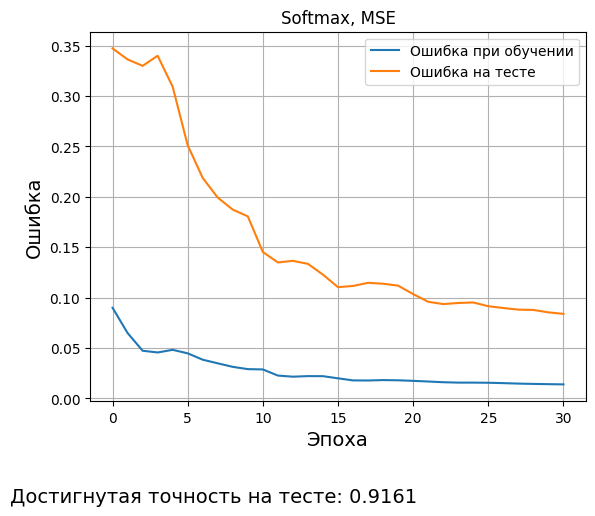

In [63]:
model = SoftmaxNN(784, 300, 50, 10)
optimizer = optim.Adam(params=model.parameters(), lr=0.01)
loss_function = nn.MSELoss()
epochs = 31

Loss = [0] * epochs
LossTest = [0] * epochs
Epochs = [i for i in range(epochs)]

for _e in range(epochs):
    model.train()
    predict = model(x_train)
    loss = loss_function(predict, y_train)
    Loss[_e] = loss.item()  # Получаем скалярное значение потерь

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()

    Q = 0  # Сброс Q в начале каждой эпохи
    with torch.no_grad():
        p = model(x_test)
        p = torch.argmax(p, dim=1)
        y = torch.argmax(y_test, dim=1)
        Q += torch.sum(p != y).item()

    LossTest[_e] = Q / len(data_test)  # Сохраняем долю ошибок


Plot(Epochs, Loss, LossTest, 'Softmax', 'MSE')

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


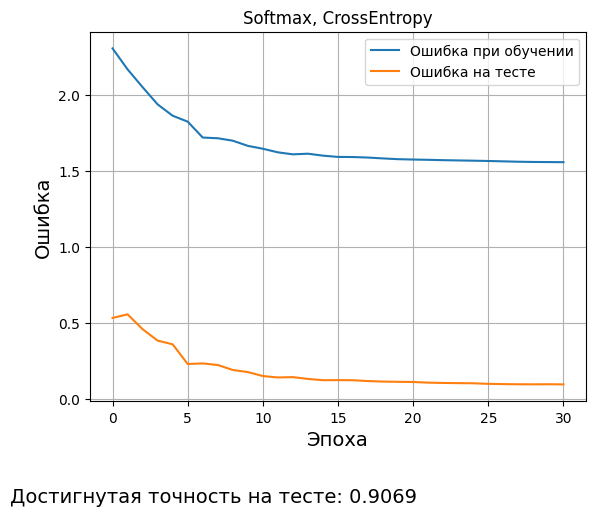

In [64]:
model = SoftmaxNN(784, 300, 50, 10)
optimizer = optim.Adam(params=model.parameters(), lr=0.01)
loss_function = nn.CrossEntropyLoss()
epochs = 31

Loss = [0] * epochs
LossTest = [0] * epochs
Epochs = [i for i in range(epochs)]

for _e in range(epochs):
    model.train()
    predict = model(x_train)
    loss = loss_function(predict, y_train)
    Loss[_e] = loss.item()  # Получаем скалярное значение потерь

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()

    Q = 0  # Сброс Q в начале каждой эпохи
    with torch.no_grad():
        p = model(x_test)
        p = torch.argmax(p, dim=1)
        y = torch.argmax(y_test, dim=1)
        Q += torch.sum(p != y).item()

    LossTest[_e] = Q / len(data_test)  # Сохраняем долю ошибок


Plot(Epochs, Loss, LossTest, 'Softmax', 'CrossEntropy')

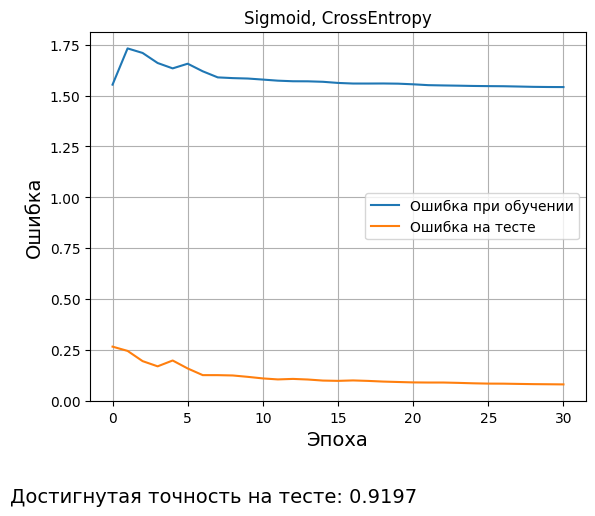

In [65]:
model1 = SigmoidNN(784, 300, 50, 10)
optimizer = optim.Adam(params=model.parameters(), lr = 0.01)
loss_function = nn.CrossEntropyLoss()
epochs = 31

Loss = [0] * epochs
LossTest = [0] * epochs
Epochs = [i for i in range(epochs)]

for _e in range(epochs):
    model.train()
    predict = model(x_train)
    loss = loss_function(predict, y_train)
    Loss[_e] = loss.item()  # Получаем скалярное значение потерь

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()

    Q = 0  # Сброс Q в начале каждой эпохи
    with torch.no_grad():
        p = model(x_test)
        p = torch.argmax(p, dim=1)
        y = torch.argmax(y_test, dim=1)
        Q += torch.sum(p != y).item()

    LossTest[_e] = Q / len(data_test)  # Сохраняем долю ошибок


Plot(Epochs, Loss, LossTest, 'Sigmoid', 'CrossEntropy')

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


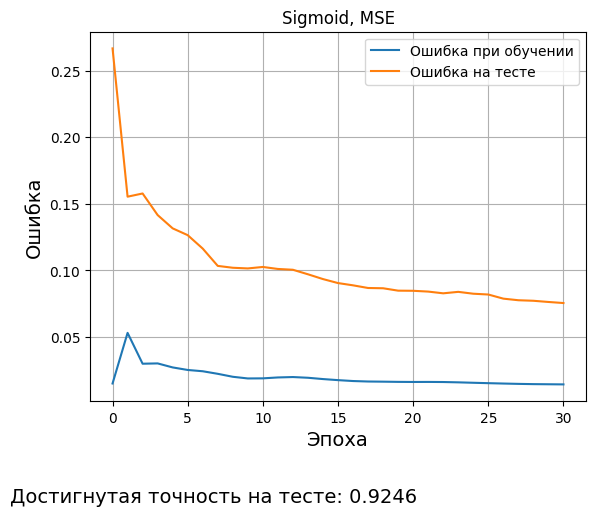

In [66]:
model1 = SigmoidNN(784, 300, 50, 10)
optimizer = optim.Adam(params=model.parameters(), lr = 0.01)
loss_function = nn.MSELoss()
epochs = 31

Loss = [0] * epochs
LossTest = [0] * epochs
Epochs = [i for i in range(epochs)]

for _e in range(epochs):
    model.train()
    predict = model(x_train)
    loss = loss_function(predict, y_train)
    Loss[_e] = loss.item()  # Получаем скалярное значение потерь

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()

    Q = 0  # Сброс Q в начале каждой эпохи
    with torch.no_grad():
        p = model(x_test)
        p = torch.argmax(p, dim=1)
        y = torch.argmax(y_test, dim=1)
        Q += torch.sum(p != y).item()

    LossTest[_e] = Q / len(data_test)  # Сохраняем долю ошибок


Plot(Epochs, Loss, LossTest, 'Sigmoid', 'MSE')

Ошибки

TP(true positive) - мы предсказали положительную метку и угадали

FP(false positive) - мы предсказали положительную метку, но ошиблись (ошибка первого рода)

TN(true negative) - мы предсказали отрицательную метку и угадали

FN(false negative ) - мы предсказали отрицательную метку, но ошиблись (ошибка второго рода)

\begin{equation}
Precision = \frac{TP}{TP+FP};
\end{equation}

\begin{equation}
Recall = \frac{TP}{TP+FN};
\end{equation}

F1 - Метрика качесва

\begin{equation}
F1 = \frac{2}{\frac{1}{Recall}+\frac{1}{Precision}} = 2\cdot\frac{Recall \cdot Precision}{Recall+Precision} = \frac{TP}{TP+\frac{FP+FN}{2}};
\end{equation}

